In [1]:
#Source Article: https://rubikscode.net/2021/06/29/top-9-feature-engineering-techniques/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
#Source Data: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data?select=penguins_size.csv
data = pd.read_csv('data\\penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Imputation

In [4]:
print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [5]:
#Remove NaN records
data = pd.read_csv('data\\penguins_size.csv')
data = data.dropna()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
#Replace NaN with 0
data = pd.read_csv('data\\penguins_size.csv')
data = data.fillna(0)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
#Replace missing value with mean value.
# the categorical feature ‘sex‘, we use the most frequent value.
data = pd.read_csv('./data/penguins_size.csv')

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)

data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)

data.reset_index()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [8]:
#Identifying invalid values in the variable Sex
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [9]:
data = data.drop([336])
data.reset_index()

,index,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...
338,339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
339,340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
340,341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
341,342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# Categorical Encoding

In [11]:
#Categorical Encoding
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [12]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
categorical_data.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


# Label encoding

In [13]:
#Label encoding is converting each categorical value into some number. 
#For example, the ‘species‘ feature contains 3 categories. We can assign value 0 to Adelie, 1 to Gentoo and 2 to Chinstrap.

categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,MALE,0,2,1
1,Adelie,Torgersen,FEMALE,0,2,0
2,Adelie,Torgersen,FEMALE,0,2,0
3,Adelie,Torgersen,MALE,0,2,1
4,Adelie,Torgersen,FEMALE,0,2,0


In [14]:
#groupby examples below!!!!!!!
data.groupby(["species","island","sex"]).count()

culmen_length_mm  culmen_depth_mm  \
species   island    sex                                         
Adelie    Biscoe    FEMALE                22               22   
                    MALE                  22               22   
          Dream     FEMALE                27               27   
                    MALE                  29               29   
          Torgersen FEMALE                24               24   
                    MALE                  28               28   
Chinstrap Biscoe    FEMALE                 0                0   
                    MALE                   0                0   
          Dream     FEMALE                34               34   
                    MALE                  34               34   
          Torgersen FEMALE                 0                0   
                    MALE                   0                0   
Gentoo    Biscoe    FEMALE                58               58   
                    MALE                  65               65   
          Dream     FEMALE                 0                0   
                    MALE                   0                0   
          Torgersen FEMALE                 0                0   
                    MALE                   0                0   

                            flipper_length_mm  body_mass_g  
species   island    sex                                     
Adelie    Biscoe    FEMALE                 22           22  
                    MALE                   22           22  
          Dream     FEMALE                 27           27  
                    MALE                   29           29  
          Torgersen FEMALE                 24           24  
                    MALE                   28           28  
Chinstrap Biscoe    FEMALE                  0            0  
                    MALE                    0            0  
          Dream     FEMALE                 34           34  
                    MALE                   34           34  
          Torgersen FEMALE                  0            0  
                    MALE                    0            0  
Gentoo    Biscoe    FEMALE                 58           58  
                    MALE                   65           65  
          Dream     FEMALE                  0            0  
                    MALE                    0            0  
          Torgersen FEMALE                  0            0  
                    MALE                    0            0

In [15]:
data.groupby(["species"]).count()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,152,152,152,152,152
Chinstrap,68,68,68,68,68,68
Gentoo,123,123,123,123,123,123


In [16]:
data.groupby(["island"]).count()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,167,167,167,167,167,167
Dream,124,124,124,124,124,124
Torgersen,52,52,52,52,52,52


In [17]:
data.groupby(["sex"]).count()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,,,
FEMALE,165,165,165,165,165,165
MALE,178,178,178,178,178,178


# One-Hot Encoding

In [18]:
#One-Hot Encoding
#It spreads the values in a feature to multiple flag features and assigns values 0 or 1 to them.

categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)


encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

categorical_data.head()

,species,island,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,MALE,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,FEMALE,1,0,0,0,0,1,1,0


# Count Encoding

In [19]:
#Count Encoding
#Count encoding is converting each categorical value to its frequency, 
#ie. the number of times it appears in the dataset. 
#For example, if the ‘species‘ feature contains 6 occurrences of class Adelie
#we will replace every Adelie value with the number 6. 

categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()

categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

categorical_data

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc
0,Adelie,Torgersen,MALE,152,52,178
1,Adelie,Torgersen,FEMALE,152,52,165
2,Adelie,Torgersen,FEMALE,152,52,165
3,Adelie,Torgersen,MALE,152,52,178
4,Adelie,Torgersen,FEMALE,152,52,165
...,...,...,...,...,...,...
339,Gentoo,Biscoe,MALE,123,167,178
340,Gentoo,Biscoe,FEMALE,123,167,165
341,Gentoo,Biscoe,MALE,123,167,178
342,Gentoo,Biscoe,FEMALE,123,167,165


# Target Encoding

In [20]:
# Target Encoding
#Target encoding is the process of replacing a categorical value with the mean of the target variable.

categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
categorical_data["species"] = categorical_data["species"].cat.codes

island_means = categorical_data.groupby('island')['species'].mean()
sex_means = categorical_data.groupby('sex')['species'].mean()

In [21]:
island_means

island
Biscoe       1.473054
Dream        0.548387
Torgersen    0.000000
Name: species, dtype: float64

In [22]:
island_means

island
Biscoe       1.473054
Dream        0.548387
Torgersen    0.000000
Name: species, dtype: float64

In [23]:
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

,species,island,sex,island_target_enc,sex_target_enc
0,0,Torgersen,MALE,0.000000,0.921348
1,0,Torgersen,FEMALE,0.000000,0.909091
2,0,Torgersen,FEMALE,0.000000,0.909091
3,0,Torgersen,MALE,0.000000,0.921348
4,0,Torgersen,FEMALE,0.000000,0.909091
...,...,...,...,...,...
339,2,Biscoe,MALE,1.473054,0.921348
340,2,Biscoe,FEMALE,1.473054,0.909091
341,2,Biscoe,MALE,1.473054,0.921348
342,2,Biscoe,FEMALE,1.473054,0.909091


In [24]:
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

,species,island,sex,island_target_enc,sex_target_enc
0,0,Torgersen,MALE,0.000000,0.921348
1,0,Torgersen,FEMALE,0.000000,0.909091
2,0,Torgersen,FEMALE,0.000000,0.909091
3,0,Torgersen,MALE,0.000000,0.921348
4,0,Torgersen,FEMALE,0.000000,0.909091
...,...,...,...,...,...
339,2,Biscoe,MALE,1.473054,0.921348
340,2,Biscoe,FEMALE,1.473054,0.909091
341,2,Biscoe,MALE,1.473054,0.921348
342,2,Biscoe,FEMALE,1.473054,0.909091


# Leave One Out Target Encoding

In [46]:
#Leave One Out Target Encoding
#It works in the same way as Target encoding with one difference. 
#When we are calculating the mean output value for the sample, we exclude that sample. 

def leave_one_out_mean(series):
   series = (series.sum()-series)/(len(series)-1)
   return series

categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
categorical_data.head()

categorical_data['island_loo_enc'] = categorical_data.groupby('island')['species'].apply(leave_one_out_mean)
categorical_data['sex_loo_enc'] = categorical_data.groupby('sex')['species'].apply(leave_one_out_mean)
categorical_data

In [25]:
categorical_data.groupby('sex')['species']

# Handling Outliers

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

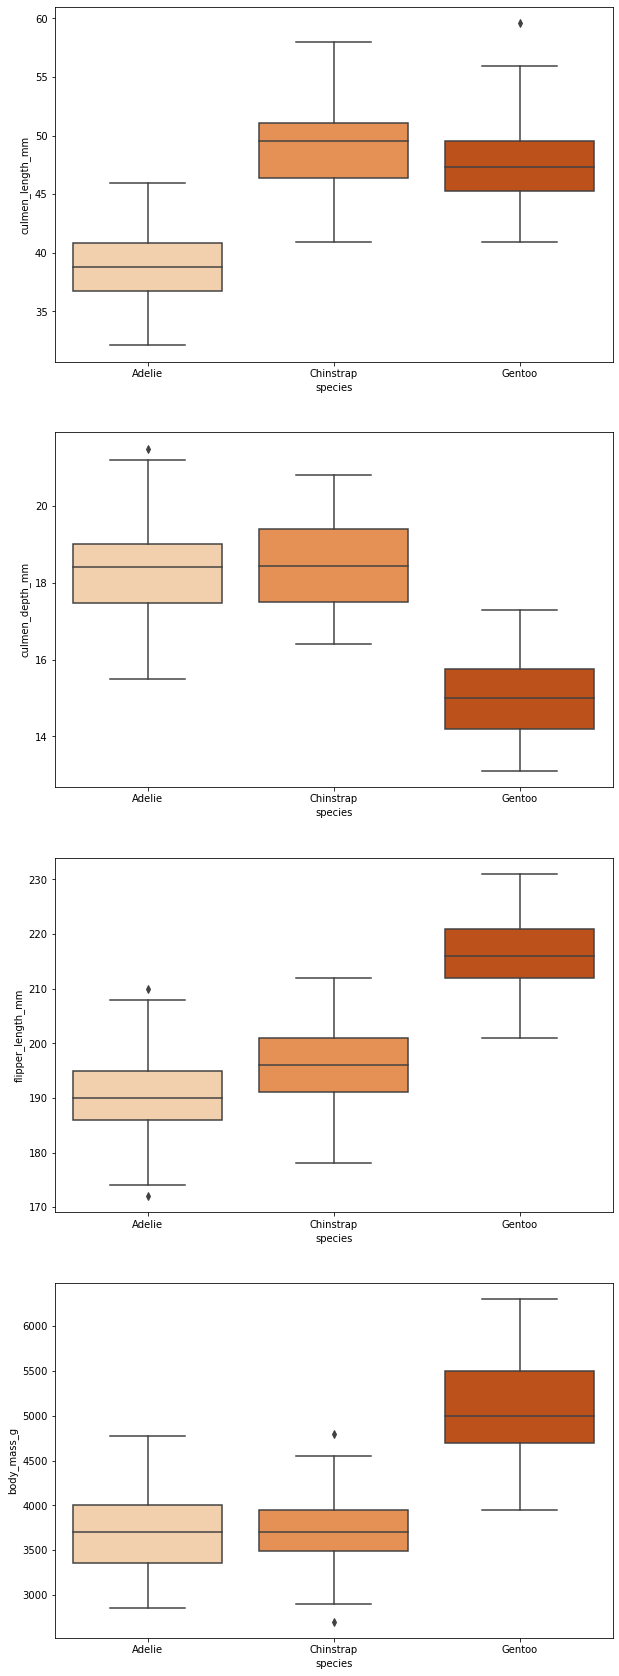

In [26]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")

In [27]:
#Using Standard Deviation
factor = 2
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [28]:
#Using Percentile
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


# Binning

In [29]:
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])
bin_data

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,culmen_length_mm,culmen_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Mid
3,43.92193,Mid
4,36.70000,Low
...,...,...
339,43.92193,Mid
340,46.80000,Mid
341,50.40000,High
342,45.20000,Mid


# Scaling

In [30]:
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4199.791570763644
Standard Deviation: 799.9508688401579


In [31]:
#Standard Scaling
#X(scaled) = (x-mean) / std

standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())

Mean: -1.6313481178165566e-16
Standard Deviation: 1.0014609211587777


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:>

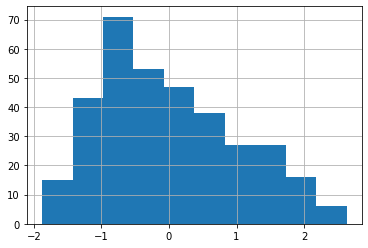

In [32]:
scaled_data['body_mass_scaled'].hist()

In [33]:
#Min-Max Scaling - Normalization
#X(Scaled)=Xstd * (max-min) + min

minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.4166087696565679
Standard Deviation: 0.2222085746778217


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:>

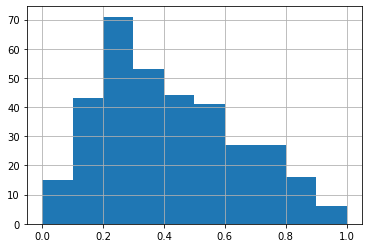

In [34]:
scaled_data['body_mass_min_max_scaled'].hist()

In [35]:
#Quantile Transformation
#sometimes machine learning algorithms require that the distribution of our data is uniform or normal. 
#We can achieve that using QuantileTransformer class from SciKit Learn.

#Uniform Distribution
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

Mean: 0.5003068896731625
Standard Deviation: 0.2899470129457298


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:>

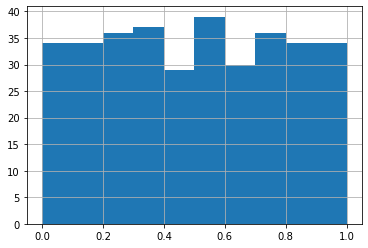

In [36]:
scaled_data['body_mass_q_trans_uniform'].hist()

In [37]:
#Normal Distribution
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Mean: 0.0012074951683245076
Standard Deviation: 1.0603588849546568


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

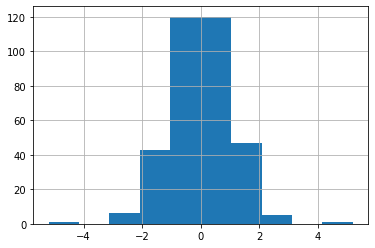

In [38]:
scaled_data['body_mass_q_trans_normal'].hist()

In [39]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled,body_mass_q_trans_uniform,body_mass_q_trans_normal
0,3750.000000,-0.563095,0.291667,0.356725,-0.367226
1,3800.000000,-0.500500,0.305556,0.394737,-0.266994
2,3250.000000,-1.189047,0.152778,0.087719,-1.354934
3,4201.754386,0.002457,0.417154,0.565789,0.165664
4,3450.000000,-0.938666,0.208333,0.185673,-0.893957
...,...,...,...,...,...
339,4201.754386,0.002457,0.417154,0.565789,0.165664
340,4850.000000,0.813998,0.597222,0.773392,0.750064
341,5750.000000,1.940711,0.847222,0.967836,1.849903
342,5200.000000,1.252164,0.694444,0.853801,1.052876


In [40]:
#Log Tranformation
#Used on right skwed data to make it normal distribution

log_data = data[['body_mass_g']]
log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)
log_data

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,body_mass_g,body_mass_log
0,3750.000000,8.229778
1,3800.000000,8.243019
2,3250.000000,8.086718
3,4201.754386,8.343495
4,3450.000000,8.146419
...,...,...
339,4201.754386,8.343495
340,4850.000000,8.486940
341,5750.000000,8.657129
342,5200.000000,8.556606


array([[<AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

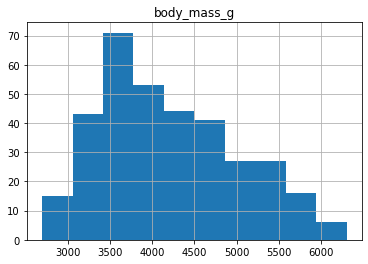

In [41]:
data[['body_mass_g']].hist()

<AxesSubplot:>

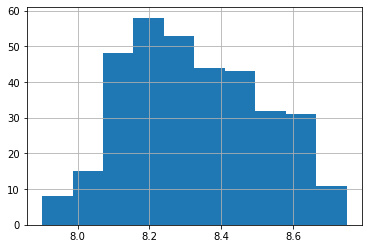

In [42]:
log_data['body_mass_log'].hist()

# Feature Selection

In [43]:
feature_sel_data = data.drop(['species'], axis=1)

feature_sel_data["island"] = feature_sel_data["island"].cat.codes
feature_sel_data["sex"] = feature_sel_data["sex"].cat.codes

# Use 3 features
selector = SelectKBest(f_classif, k=3)

selected_data = selector.fit_transform(feature_sel_data, data['species'])
selected_data

array([[ 39.1,  18.7, 181. ],
       [ 39.5,  17.4, 186. ],
       [ 40.3,  18. , 195. ],
       ...,
       [ 50.4,  15.7, 222. ],
       [ 45.2,  14.8, 212. ],
       [ 49.9,  16.1, 213. ]])

In [44]:
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=data.index, 
                                 columns=feature_sel_data.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,39.10000,18.70000,181.000000
1,39.50000,17.40000,186.000000
2,40.30000,18.00000,195.000000
3,43.92193,17.15117,200.915205
4,36.70000,19.30000,193.000000


# Feature Grouping

In [45]:
grouped_data = data.groupby('species')

sums_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].sum().add_suffix('_sum')
avgs_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].mean().add_suffix('_mean')

sumed_averaged = pd.concat([sums_data, avgs_data], axis=1)
sumed_averaged

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,culmen_length_mm_sum,culmen_depth_mm_sum,culmen_length_mm_mean,culmen_depth_mm_mean
species,,,,
Adelie,5901.42193,2787.45117,38.825144,18.338495
Chinstrap,3320.70000,1252.60000,48.833824,18.420588
Gentoo,5842.52193,1844.25117,47.500178,14.993912
